
<h3 align="center"> <font color='Green'>A complete guide on Linear Regression(Using Car price prediction)</font></h3> 


## Table of Contents



1.  <a href="#1.What-is-Linear-Regression?">Linear Regression overview</a>
2.  <a href="#2.Assumptions-of-Linear-Regression">Its assumptions </a>
3.  <a href="#3.Problem-Statement">Understanding the problem statement</a>
4.  <a href="#4.Importing-Libraries">Importing Libraries </a>
5.  <a href="#5.Importing-data">Importing data</a>
6.  <a href="#6.Understanding-the-Dataset">Understanding the Dataset</a>
7.  <a href="#7.Preprocessing-the-data">Data Pre-processing</a>
8.  <a href="#8.Extrapolatory-data-analysis">Extrapolatory Data Analysis</a>
9.  <a href="#9.Preparing-the-data-for-model-building">Preparing dataset for model building</a>
10. <a href="#10.Model-1(Linear-Regression)">Linear Regression model</a>
11. <a href="#11.Model-2(Ridge-regressor-using-feature-selection-and-hyperparameter-tuning-technique)">Ridge Regression model using hyperparameter tuning</a>
12. <a href="#12.Model-3(Linear-Regression-with-feature-selection-technique)">Linear Regression model using feature selection technique</a>
13. <a href="#13.Model-4(Ridge-regression-with-hyperparameter-tuning-and-feature-selection)">Ridge regression using hyperparameter tuning and feature selection technique</a>
14. <a href="#14.Conclusion">Conclusion</a>

# 1.What is Linear Regression?

Linear Regression is a parametric algorithm of machine learning.It is a linear approach to model the relationship between a dependent variable and one or more independent variables.It is used to predict the values for regression type problem,which means that the dependent variable should be of continuous datatype.

The main objective of the linear regression model is to reduce the error between the predicted and the actual values i.e. to reduce the cost function.It is done by updating the weights using gradient descent.Gradient is the partial derivative of the cost function with respect to old weight.

Formula for updating the weights is:

$W_n=W_o+\frac{\partial L}{\partial W_o}$

The hypothesis function of linear regression is $y=W_0 + W_1*X_1 + W_2*X_2 +...+ W_nX_n$<br>

Where Ws are the weights or parameters

cost function=$\sum \limits _{i=1}^ n (y_{i}-\hat{y}_{i})^2$

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">To learn more about Linear Regression click here </a>


## 2.Assumptions of Linear Regression


**The assumptions are:**

>1. **Linearity** :The independent and the dependent variables should be linearly related to each other.

>2. **No endogeniety**: The indepednent features should not have any relation with the error term.

>3. **Normality and homoscedasticity**: The error term should be normally distributed.It should not show variable variance,          which means that the error term should be same across all the values of independent variables.

>4. **No autocorrelation**: There should not be any autocorrelation between the residuals which means that the error term             should not be related to the lag of itself.

>5. **No multicollinearity**: The independent variables should not be having high correlation between themselves.
---

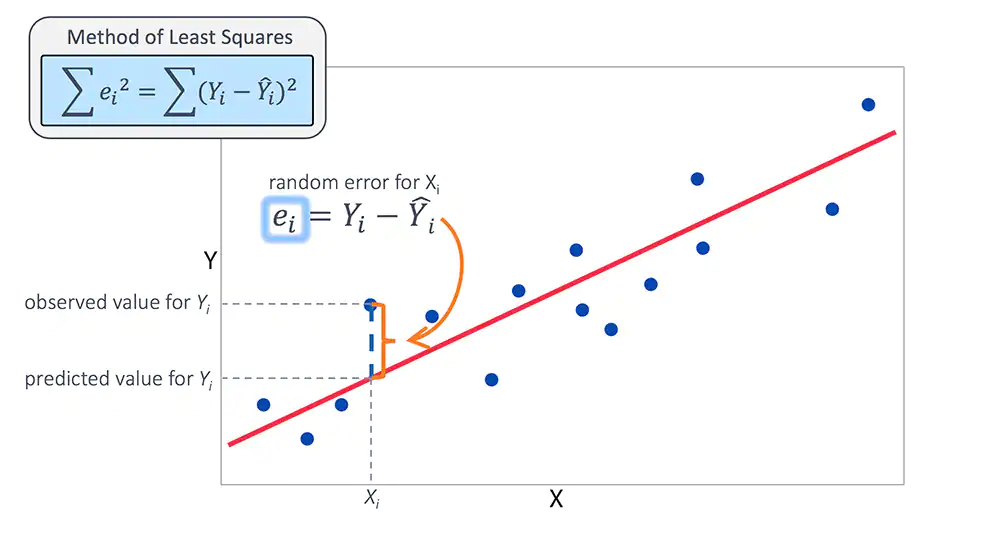

As the above image shows we need to minimise the loss. Which is the difference between the actual and predicted value.

The predicted line which makes the loss least is known as the best fit line.


## 3.Problem Statement

With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we all aspire to own a car within budget with the best features available. The objective of the problem is to build a model with the dataset that can predict the price of the car with the features given.Regression analysis(Linear regression) has been used to predict the price of the cars. 

**<font color='blue'><u>Data Definitions:</u> </font>**

 1.ID: This is the unique identity if each car<br>
 2.Levy: The road tax on each car<br>
 3.Manufacturer: Manufacturer of each car<br>
 4.Model: Model of each car<br>
 5.Prod. year: Year of production of the car<br>
 6.Category: Category of the car such as sedan,hatchback,jeep etc.<br>
 7.Leather interior: Whether the interior is of leather or not<br> 
 8.Fuel type: Is it a petrol,diesel or hybrid<br>
 9.Engine volume: Volume of engine<br>
 10.Mileage: Mileage of the car<br>
 11.Gear box type: Type of gear box<br>
 12.Drive wheels: Is it a front or rear drive vehicle<br>
 13.Doors: Number of doors in the car<br>
 14.Wheel: Is it left wheel or right wheel drive<br>
 15.Color: Color of the car<br>
 16.Airbags: Number of airbags in the car<br>

## 4.Importing Libraries

In [337]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D plots built on numpy arrays
import matplotlib.pyplot as plt

# 'Seaborn' is a Python data-visualisation library based on Matplotlib that provides an interface for drawing statistical graphics
import seaborn as sns

# 'datetime' library is used to perform datetime operations
import datetime as dt

# 'GridSearchCV' is used to search for the best parameters to train the model
from sklearn.model_selection import GridSearchCV

#'train_test_split' function is used to split the data for training and testing the model
from sklearn.model_selection import train_test_split

#importing metrics for tabulating the result
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score,mean_absolute_error

#Algorithm used for feature selection
from sklearn.ensemble import RandomForestRegressor

#Importing function to perform regression
from sklearn.linear_model import LinearRegression, Ridge,Lasso
import statsmodels.api as sm

# 'SciPy' is used to perform scientific computations
from scipy.stats import shapiro

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

## 5.Importing data

In [266]:
#Importing the data using "read_csv" and storing it into the variable df
#This method is used by pandas to import data directly from the local 'C' drive
df = pd.read_csv('train.csv')

[<a href="#Table-of-Contents">Back to top </a>]

## 6.Understanding the Dataset

In [267]:
#Displaying the first five records of the dataset 
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4



Interpretation from the data displayed above:

1)The 'Levy' column contains '-' symbol.We need to look into this column and understand the meaning of the symbol '-'.

2)In the 'Doors' column there are month names present.We need to remove them, as the doors column should be an interger.

3)In the 'Mileage' column there is 'km' written, we need to remove this 'km' from the 'Mileage' column. It is because the algorithms only understand numbers and not characters.

In [268]:
#Understanding the shape of the data
#The function 'shape' returns a tuple with the first element representing rows 
#the second element represents the number of columns
df.shape

(19237, 18)

We can see that there are 19237 rows and 18 columns

In [269]:
#assigning the column 'Price' to the variable 'y'
#This is our dependent feature and hence we are seperating it out from the dataset before performing any preprocessing on the dataset
y=df['Price']

In [270]:
#Dropping the dependent feature from the dataset
#'drop' function is used for dropping a row or a column
#We use axis=1 of we want to drop a column and axis=0 if we want to drop a row
df = df.drop(['Price'],axis=1)

**<font color='blue'><u>Data Type:</u></font>**

The main data types in Pandas dataframes are the object, float64, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
>1. Check for the data type <br>
>2. For any incorrect data type, change the data type with the appropriate type

In [271]:
#creating an empty dataframe 'info'
info = pd.DataFrame()

#checking the datatypes and Unique values of each column
#checking unique values in a column helps us to understand whether a column should be of categorical type or numerical type
#creating two columns named 'DataTypes' and 'Unique_values' in the dataframe info 
#These columns will store the original datatype of the columns in the dataset and the unique values of the corresponding columns
info['DataTypes'] = df.dtypes
info['Unique_values'] = df.nunique()
info

,DataTypes,Unique_values
ID,int64,18924
Levy,object,559
Manufacturer,object,65
Model,object,1590
Prod. year,int64,54
Category,object,11
Leather interior,object,2
Fuel type,object,7
Engine volume,object,107
Mileage,object,7687


From the above table we can see that the column 'Mileage' is mentioned to be of object datatype, whereas it should be either float/integer type.We will change the datatype of this column.

**<font color='blue'><u>Importance of converting a column into right datatype:</u></font>**


1)The model doesn't understands string type data such as name,grades,place etc.Hence, before training a model we need to convert all the data into numerical form.

2)For converting a string type data into numerical datatype we use either "Label encoding" or "one hot encoding".

3)Label encoding is used when the data is of object type and has some order for example rating given by customers(A,B,C,D,E,F) or grades of students(A+,A,B+,B).Here in the examples cited, there is an order in the data. In such a scenario we use label encoding to convert a string type data into numerical data.

4)When the data is of object type  but there is no order in the data, then we use 'one hot encoding' to convert the object type data into numerical data type for example name of places,name of persons etc.

5)'get_dummies' from pandas is used to convert the object datatype into numerical datatype.

**<font color='blue'><u>Summary Statistics:</u></font>**

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for categorical variables.

In our dataset we have both numerical and categorical variables. Now we check for summary statistics of all the variables
1. For numerical variables, use the describe()<br>
2. For categorical variables, use the describe(include=object)

In [272]:
#Using the describe function to find:
#count,unique values,frequency of the most occuring element and the most occuring element in a column
df.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [273]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df.describe()

,ID,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,2010.912824,4.582991,6.582627
std,9.365914e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1939.000000,1.000000,0.000000
25%,4.569837e+07,2009.000000,4.000000,4.000000
50%,4.577231e+07,2012.000000,4.000000,6.000000
75%,4.580204e+07,2015.000000,4.000000,12.000000
max,4.581665e+07,2020.000000,16.000000,16.000000


**<font color='blue'><u>Deductions from statistical summary:</u></font>**

1.The highest car manufacturer is 'Hyundai' and its count is 3769 out of 19237 records.<br>
2.There are 16 different color of cars and the most used color is 'black'.<br>
3.The gear box type in maximum cars is 'automatic'.
4.It can also be noticed that there are no missing values in any column as the count of all the columns are 19237.

<a href="#Table-of-Contents">Back to top </a>

## 7.Preprocessing the data

**<font color='blue'>Why is preprocessing of data required? </font>**


It is said a model is as good as its data. This is the reason we need to prepare the data before training the model.
Data preparation is the process of cleaning and transforming raw data before building predictive models.In data preprocessing following steps are followed as and when required.<br><br>
                        Here, we analyze and prepare data to perform regression analysis:<br>
                        
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate 
                        2. If data types are not as per business definition, change the data types as per requirement 
                        3. Study summary statistics
                        4. Distribution of variables
                        5. Study correlation
                        6. Detect outliers
                        7. Check for missing values
                        8. Do feature engineering to add meaning features to train the model
**<u>Note</u>**: It is an art to explore data, and one needs more and more practice to gain expertise in this area

In [274]:
#removing the 'km' from the mileage column 
#'split' function can only be used in string type of data.Hence we always convert a column to string type before splitting it.
#(" ",n=1,expand=True) the arguments does splits the column by the first space it encounters

df['Mileage'] =df['Mileage'].str.split(" ",n=1,expand=True)

In [275]:
#Converting the column into float datatype
#before converting a column into integer or float its important to remove string literals from the column
#Hence, it was important to seperate out 'km' from the column 

df['Mileage']=df['Mileage'].astype('float')

In [276]:
#replacing all the '0' values with the mean values of the 'Mileage' column
df['Mileage'] = np.where(df['Mileage'] == 0.0,df['Mileage'].mean(),df['Mileage'])

In [277]:
#checking the unique values of 'Doors' column
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [278]:
#Removing the string literals from 'Doors' column
#Using 'np.where' function of numpy to find the specific values and perform the split operation on them
#syntax of "np.where" is (condition,if true value,if false value)
# '|' is the symbol of the or operand 

df['Doors'] = np.where((df['Doors'] == '04-May') | (df['Doors'] == '02-Mar'), df['Doors'].str.split('-').str[0],df['Doors'])

In [279]:
#checking the unique values of 'Doors' column after removing the string literals
df['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

In [280]:
#checking the unique values of 'Levy' column
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

**We see that all the values are of interger type except one which is '-'.**

**<font color='blue'><u>Whenever we encounter such situations following steps can be taken:</u></font>**

1)We can drop all the rows with such special characters 

2)We can replace those special characters with the mean,median or mode values of the specific column

3)We can replace it with any other value of ones choice

**<u>Note</u>: We need to try out different ways of replacing such special characters and find out which will give us better accuracy.**

In [281]:
# Replacing the '-' character with 0
# converting the Levy column to float as it is the Tax 
# "to_numeric" is a function of pandas which is used to convert an object datatype into numeric datatype
# downcast='float' changes the datatype into float

df['Levy'] = pd.to_numeric(df['Levy'].replace('-', '0'), downcast='float')

In [282]:
# Replacing the 0 in the 'Levy' column with mean of that column
# First the special character '-' needs to be replaced with 0 because for finding the mean of the column 
# all the values of a column should be of numeric type in order to find the mean of the column

df['Levy'] = np.where(df['Levy'] == 0.0,df['Levy'].mean(),df['Levy'])

In [283]:
# checking the unique values in the 'Engine volume' column

df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [284]:
# We will remove all the string literals from the column so that it can be converted into numeric data type 
# function "to_numeric" of pandas is used to convert the column to numeric datatype

df['Engine volume'] = pd.to_numeric(df['Engine volume'].str.split(' ').str[0], downcast='float')

In [285]:
# Replacing the '0' in the 'Engine volume' column with the mean value of that column
# We can see from the unique values of 'Engine Volume' that there is '0' 
# since the 'Engine volume' of no vehicle can be '0', so we replace it with the mean of the column

df['Engine volume']=np.where(df['Engine volume'] == 0.0,df['Engine volume'].mean(),df['Engine volume'])

***Feature engineering is the process of deriving new features(indepedent variable) from the existing features(independent variable), that will help in training the model and in turn would improve the accuracy of the model or reduce the loss of the model.***

In [286]:
# Feature engineering using the "production year" column
# "datetime.now()" gives the current date and time as in the system 

currt_time = dt.datetime.now()
df['Prod. year'] = currt_time.year - df['Prod. year'] 

In [287]:
# checking the missing values in the dataset
# "isnull" function gives the missing values in a column
df.isnull().sum()

ID                  0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

We can see that there are no missing values in the dataset. Incase there would have been missing values in the dataset,we would had replaced them by the mean,meadian or mode of that column depending upon the datatype of the column.

In [288]:
#Checking the dataset after all the pre-processing steps
df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.000000,LEXUS,RX 450,11,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.000000,CHEVROLET,Equinox,10,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,632.528687,HONDA,FIT,15,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.000000,FORD,Escape,10,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.000000,HONDA,FIT,7,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


<a href="#Table-of-Contents">Back to top </a>

## 8.Extrapolatory data analysis

**Why do we need extrapolatory data analysis?**

It is required to do extrapolatory data analysis on the data to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It can be univariate or bivariate analysis where we analyze a single feature or analyze two features together respectively.

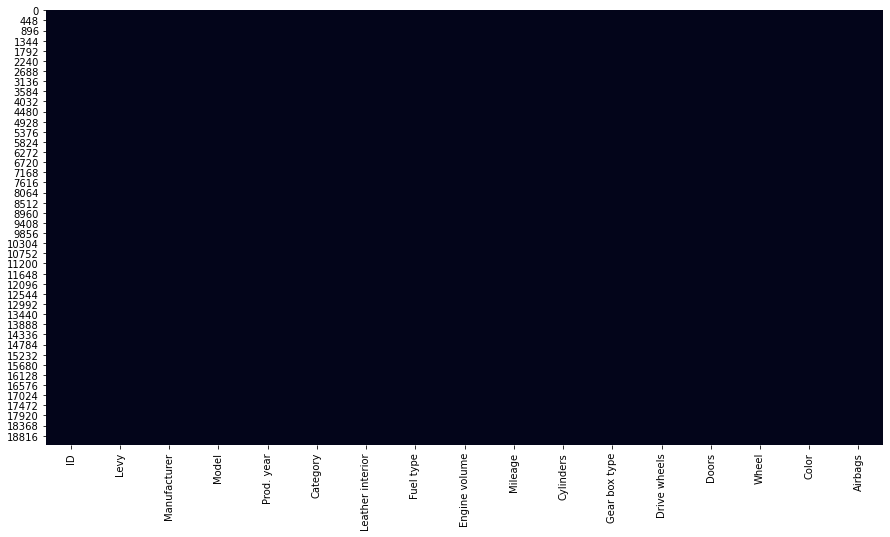

In [289]:
# plotting the missing values in the dataset using heatmap function of seaborn
# A heatmap represents the data in 2-dimensional format
sns.heatmap(df.isnull(),cbar=False)
plt.show()

We can see that there are no missing values

**<font color='blue'><u>Correlation:</u></font>**

1) The function 'corr' tells us about the correlation between two features.

2) The value of correlation lies between -1 to 1.

3) The value between -0.5 to 0.5 means low correlation.

4) The value >0.5 and <-0.5 means high correlation.

5) We drop the features with high correation to avoid multicollinearity, since it is one of the assumption of linear regression that the dataset should have no multicollinearity.

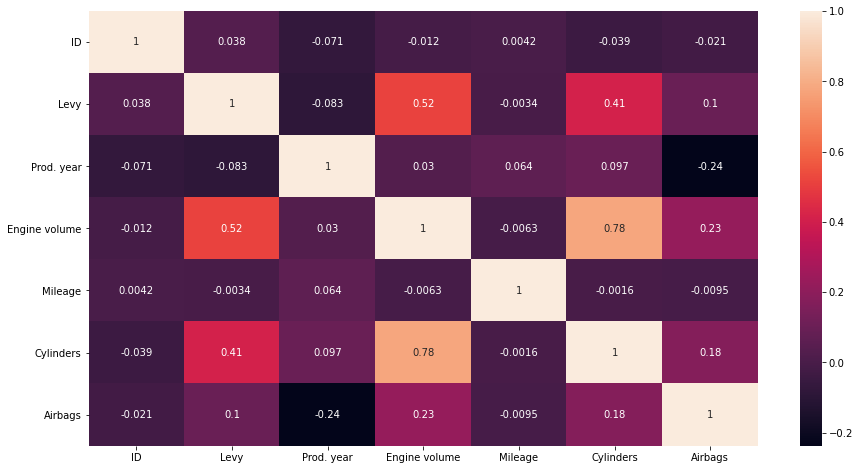

In [290]:
# Checking for correlation among the independent variables
# Uisng heatmap function of seaborn, we plot the correlations between all independent features
# The argument "cbar=True" gives the bar at the side, showing the color transition from high to low correlation
# The argument "annot=True" prints the values of correlation between features in the heatmap
# The diagonal of a correlation matrix is always 1, as its a correlation of a feature with itself

sns.heatmap(df.corr(), cbar=True, annot=True)
plt.show()


**We can see that 'Engine volume' is having high correlation with 'Cylinders' column. We will drop the 'Cylinders' column to avoid multicollinearity.**

In [291]:
# dropping the 'Cylinders' column from the dataset using the 'drop' function
# argument 'axis=1' drops the data columwise
# argument 'inplace=True' reflects the modified data in the original dataset

df.drop(['Cylinders'],axis=1,inplace=True)

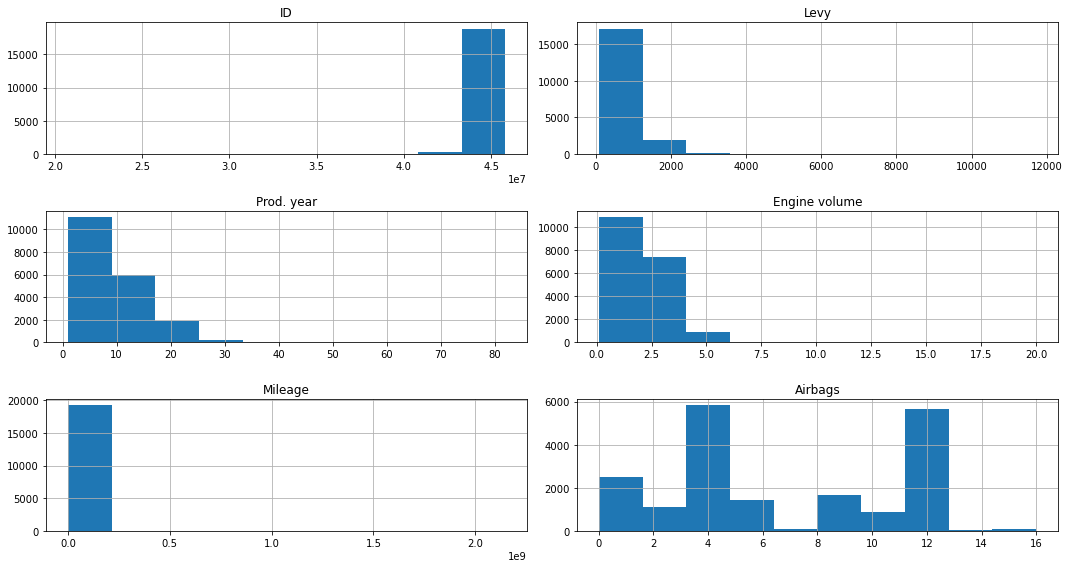

In [292]:
# Plotting the histogram of all numeric variables
# Plotting the histogram help to identify the distribution and skewness of a column
# the function "tight_layout" helps to plot all the columns together

df.hist()
plt.tight_layout()
plt.show()

We can see that 'Prod. year','Levy' and 'Engine volume' columns are right skewed.

**<font color='blue'><u>Skewness:</u></font>**

Skewness is the measure of asymmetry in the data distribution.It is of three types:

1)Positively skewed or right skewed

2)Negatively skewed or left skewed

3)No skewed

The following diagrams elaborates how the right skewed or the left skewed distribution looks and how mean,median and mode varies in those distribution.
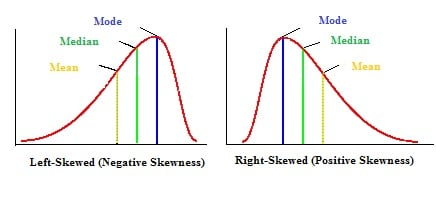

For getting the best accuracy we need that our dependent variable also known as target variable is normally distributed.In normal distribution the mean,median and the mode lies at the center.If the independent variable is right or left skewed it does not reduce the accuracy, but the dependent variable should always be normally distributed.The normal distribution can be understood from the following diagram:

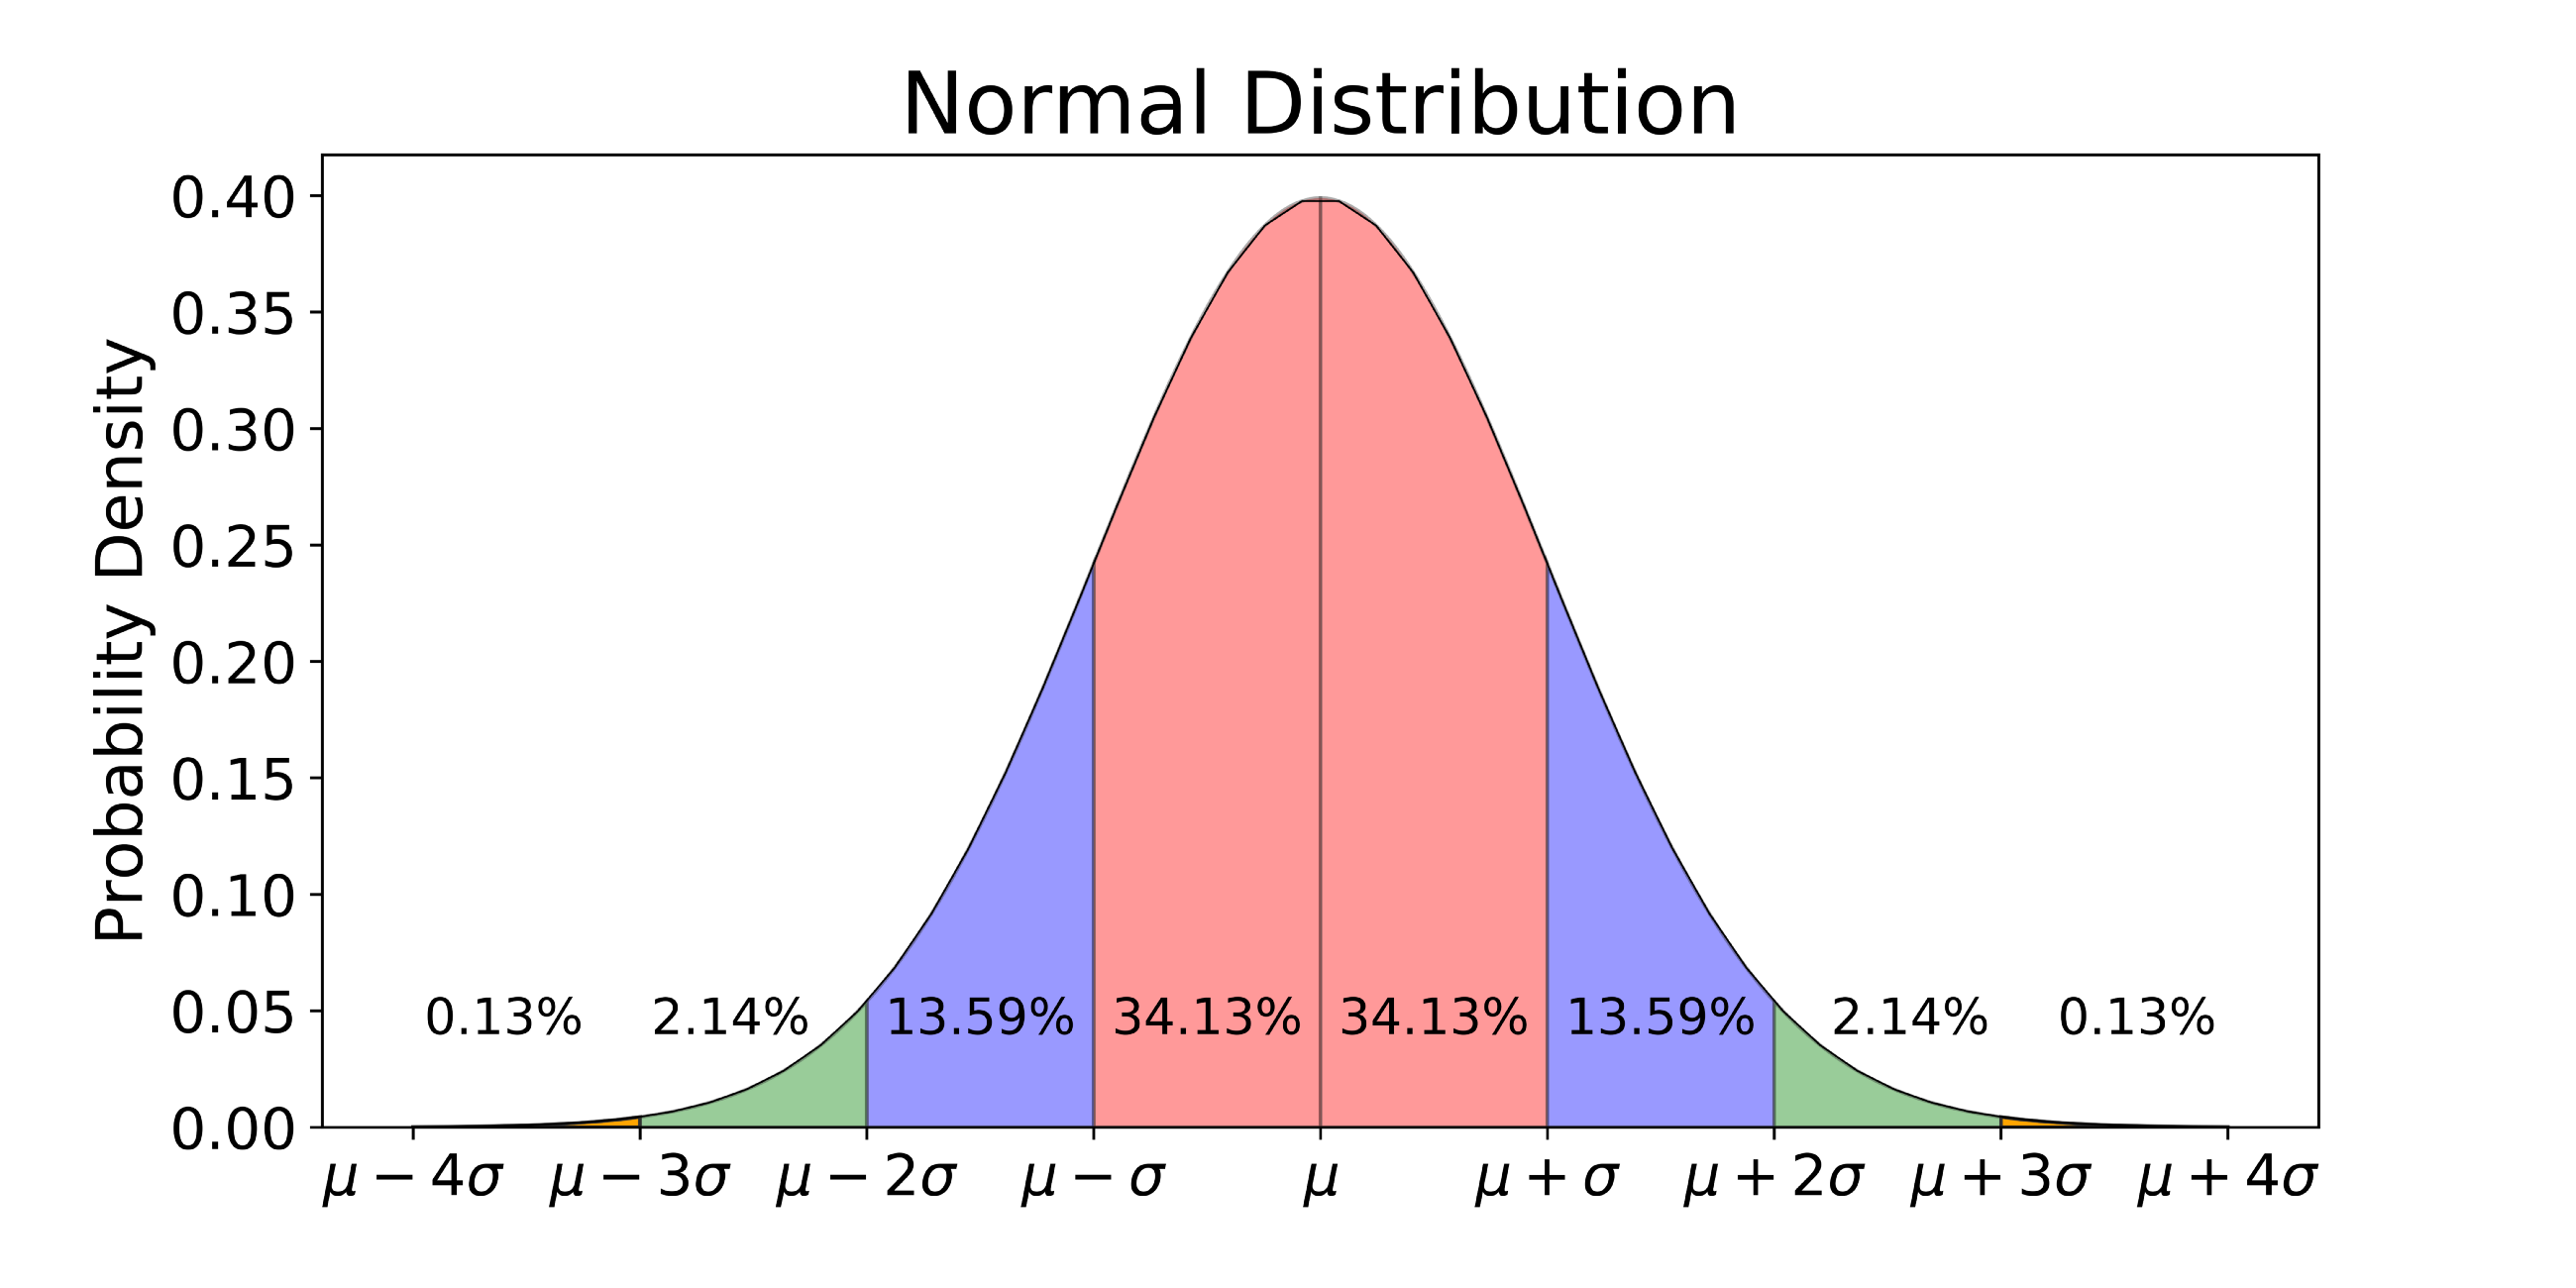

If the dependent variable is not normally distributed then we use the following two methods to make it normally distributed:

1)Log transformation

2)Box-cox transformation

**<font color='blue'><u>Some information on normal distribution:</u></font>**

1) In normal distribution mean,median and mode lies at the center of the distribution.

2) In normal distribution 68% of the data lies within the first standard distribution of the mean.

3) 95% of the data lies within the second standard deviation of the mean.

4) 99.7% data lies within the third standard deviation of the mean.

In [293]:
#We can check the skewness values using the function "skew()"
#Using "f-string" to print the values along with the statement

print(f"The skewness values of the production year is:{df['Prod. year'].skew()}")
print(f"The skewness values of the production year is:{df['Levy'].skew()}")
print(f"The skewness values of the production year is:{df['Engine volume'].skew()}")

The skewness values of the production year is:2.0822607659292403
The skewness values of the production year is:6.133322715759277
The skewness values of the production year is:2.2034800052642822



**<font color='blue'><u>In order to check for normality of the target variable</u></font>**

1. Plot a histogram and also perform the Shapiro-Wilk test 

2. If the data is not normally distributed, use log transformation to get near normally distributed data

3. Recheck for normality by plotting histogram and performing Shapiro-Wilk test
                           
                     

***The Shapiro-Wilk test is a statistical test that evaluates the normality of a population. It was developed by Samuel Sanford Shapiro and Martin Wilk in 1965.***

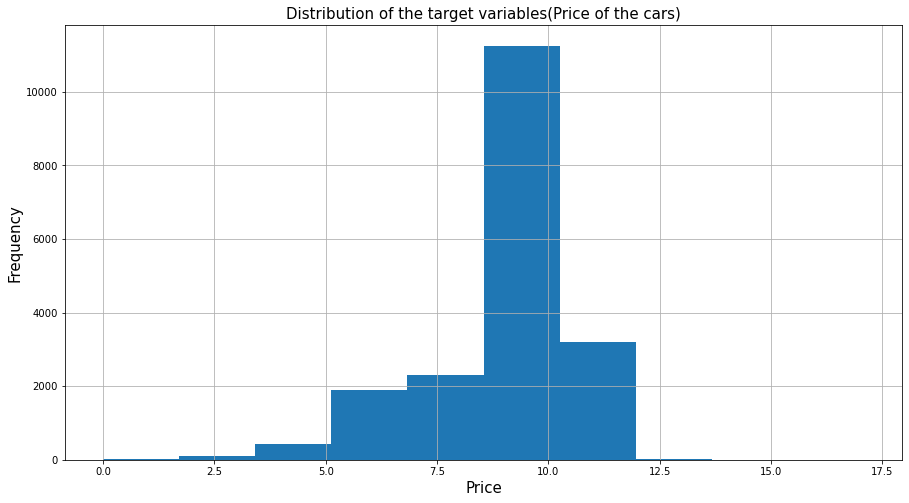

In [338]:
# check the distribution of target variable
y.hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of the target variables(Price of the cars)', fontsize = 15)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

<u>The dependent variable column is left skewed</u>

The null and alternate hypothesis of Shapiro-Wilk test is as follows: <br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>: The data is normally distributed</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: The data is not normally distributed</strong> </p>

In [295]:
# normality test using shapiro()
# the test returns the the test statistics and the p-value of the test
stat, p = shapiro(y)

# to print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.013, p-value=0.000
The data is not normally distributed (reject H0)


In [296]:
# Checking the skewness value

print("The skewness value of the target variable is:",y.skew())

The skewness value of the target variable is: 136.47042654268714


In [297]:
# As from the shapiro test and the skewness value we can see that 'Price' column is highly positively skewed
# Hence,we normalize the column using log transformation

y = np.log(y)

In [298]:
# rechecking the skeweness after log transformation
print(f"The skewness of the dependent variable after log transformation is:{y.skew()}")

The skewness of the dependent variable after log transformation is:-1.391557339534271


**Hence, we can see that the skewness of the dependent variable has considerably got reduced.**

<a href="#Table-of-Contents">Back to top </a>

## 9.Preparing the data for model building

We need to perform dummy encoding on our categorical variables before we proceed; since the model can understand only the numeric data. <br><br>
                    In order to dummy encode, we do the following: <br>
                    
                    1. Filter numerical and categorical variables<br>
                    2. Dummy encode the catergorical variables<br>
                    3. Concatenate numerical and dummy encoded categorical variables

In [299]:
# seperating the categorical and numerical data
# This is being done to apply "one hot encoding" on the columns which are having object datatype
# "select_dtypes" function selects the particular datatypes given as argument

categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(include = np.number)

**<font color='blue'>Understanding how 'get_dummies' function work:</font>**

Suppose there is a feature named gender and it has got three categories,namely:

1)Male

2)Female

3)Transgender

When we apply "get_dummies" on this feature it gives the following output:

        gender_Male           0 1 0
        gender_Female         1 0 0
        gender_Transgender    0 0 1
 
     
**<font color='blue'><u>Points to be noted:</u></font>**

1)The categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable.

2)The row having gender as 'Male', will have value 1 in the 'gender_Male' column for that particular row, while other columns of the feature gender will have value 0.

3)We drop the first or the last column to reduce model complexity and even it is obvious, that if the gender is not 'Male' or 'Female' then it is going to be 'Transgender'

In [300]:
# getting dummies for the categorical variables
# This is being done as the model cannot understand string data
# "get_dummies" function of pandas is used for one hot encoding

dummies = pd.get_dummies(categorical,drop_first=True)

In [301]:
# creating the final dataset
# the function 'concat' of pandas do concatenate two or more dataframes together
# 'axis=1' means that all the data are being concatenated column wise

df_final = pd.concat([numerical,dummies], axis=1)

In [302]:
# checking the shape of the final dataset

df_final.shape

(19237, 1699)

**<font color='blue'><u>Phases of model building:</u></font>**

1)Training phase: In this phase we use training data to train the model using an algorithm

2)Validation phase: In this phase the model is checked with the validation data.This is used to fine tune the model.

3)Testing phase: In this phase the model is exposed to new data and the accuracy of the model is checked.

**<font color='blue'><u>Model building and testing steps:</u></font>**

1. Split the data into training and test set using train_test_split

2. Build model using sklearn.linear_model

3. Predict the values using test set

4. Compute accuracy measures

5. Tabulate the results

In [303]:
# splitting the data into test and train
# Assigning all the independent variables in the variable X
# Assigning the dependent variable in the variable y
X =df_final
Y=y

# Splitting the data before building the model in order to train the model and later check its accuracy
# The argument "test_size" tells about the ratio of data, that needs to be kept for testing the model

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)


In [304]:
# Displaying the shape of the train and test data

print(f"The shape of the X_train data is:{X_train.shape}")
print(f"The shape of the X_test data is:{X_test.shape}")
print(f"The shape of the y_train data is:{y_train.shape}")
print(f"The shape of the y_test data is:{y_test.shape}")

The shape of the X_train data is:(13465, 1699)
The shape of the X_test data is:(5772, 1699)
The shape of the y_train data is:(13465,)
The shape of the y_test data is:(5772,)


## 10.Model 1(Linear Regression)

In [305]:
# Instantiating the Linear Regression model

LR=LinearRegression()

#fitting the model on the training data

model1=LR.fit(X_train,y_train)

In [306]:
# predicting the output on the test data

predicted=model1.predict(X_test)

In [307]:
# calculating the metrics root mean squared log error
RMSLE=np.sqrt(mean_squared_log_error(predicted,y_test))

In [308]:
# calculating the metrics root mean squared error
RMSE=rmse(predicted,y_test)

In [309]:
mae=mean_absolute_error(y_test,predicted)

In [310]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'RMSLE','Mean Absolute Error']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_model_withlog_metrics = pd.Series({'Model': "Linear Regression",
                     'RMSE':RMSE,
                     'RMSLE': RMSLE,
                     'Mean Absolute Error': mae     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_withlog_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,RMSLE,Mean Absolute Error
0,Linear Regression,1.327445,0.164084,0.929873


<a href="#Table-of-Contents">Back to top </a>

<font color='blue'><u>Feature Selection Techniques:</u></font>

We need to select significant features to train the model.If there are lot of features it results in increasing the model complexity.

**<font color='blue'><u>Different feature selection techniques:</u></font>**

1.For small datasets:
>i)  Forward Selection: This method considers the null model (model with no predictors) in the first step. In the next steps        start adding one variable at each step until we run out of the independent variables or the stopping rule is achieved. The      variable is added based on its correlation with the target variable.

>ii) Backward elimination: This method considers the full model (model with all the predictors) in the first step. In the next      steps start removing one variable at each step until we run out of the independent variables or the stopping rule is            achieved. The least significant variable (with the highest p-value) is removed at each step.

>iii)Recursive feature elimination: It is the process that returns the significant features in the dataset by recursively removing the less significant feature subsets.

2.For big datasets:

We train a model such as random forest,extra trees or decision tree with the available dataset and use a property of the model known as ***feature_importances_*** to find out the most significant features.

3.Features can be selected using the correlation plot, where the features with high correlation with the dependent variable       gets selected.

## 11.Model 2(Ridge regressor using feature selection and hyperparameter tuning technique)

**<font color='blue'><u>Steps used for model building:</u></font>**

1. In this model, linear regression from statsmodels has been used to find the probability values of all the features.All the       significant features have been selected i.e. features having p-value less than 0.05.

2. Ridge regressor has been used to find the best parameters.These parameters have been used in the ridge regressor to predict     the price of cars.

**<font color='blue'><u>Ridge Regressor:</u></font>**


Ridge regressor addresses the overfitting issue of linear regression.The main objective of linear regression is to reduce the error between the actual and predicted value i.e it tries to reduce the cost function.In doing so sometimes the model gets overfittied.We should always aim at creating a generalised model so that, the model works well even with the test data.

**<font color='blue'><u>Overfitting:</u></font>** It is a situation of low bias and high variance. In another words the model gives good accuracy with the training data but gives low accuracy with the test data.

In ridge regressor and lasso regressor we add a parameter to the cost function.This parameter is square of weight(slope) in ridge regressor and the weight(slope) in lasso regressor.This whole term i.e. the cost function and the parameter added needs to get reduced in ridge and lasso regressor. This reduces the overfitting issue.In short ridge and lasso regressor penalizes the features having high slope.

<a href="https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression">To know more about ridge and lasso regressor click here </a>

In [311]:
#instantiating the ordinary least square model
model2=sm.OLS(y_train, X_train).fit()

In [312]:
#displaying all the statistical summary of the model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     4.924
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        03:30:49   Log-Likelihood:                -22474.
No. Observations:               13465   AIC:                         4.765e+04
Df Residuals:                   12114   BIC:                         5.779e+04
Df Model:                        1350                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
ID                              1.565e-07   1.53e-08     10.223      0.000    1.26e-07    1.86e-07
Levy                              -0.0002   4.32e-05     -5.199      0.000      -0.000      -0.000
Prod. year                        -0.0800      0.004    -19.722      0.000      -0.088      -0.072
Engine volume                     -0.0724      0.043     -1.697      0.090      -0.156       0.011
Mileage                        -4.957e-10   2.33e-10     -2.132      0.033   -9.51e-10   -3.99e-11
Airbags                           -0.0482      0.004    -12.176      0.000      -0.056      -0.040
Manufacturer_ALFA ROMEO            3.1715      0.849      3.736      0.000       1.507       4.836
Manufacturer_ASTON MARTIN      -1.624e-06   1.61e-06     -1.008      0.313   -4.78e-06    1.53e-06
Manufacturer_AUDI                  4.5215      0.815      5.546      0.000       2.923       6.120
Manufacturer_BENTLEY               4.2673      0.804      5.307      0.000       2.691       5.843
Manufacturer_BMW                   4.9721      0.971      5.122      0.000       3.069       6.875
Manufacturer_BUICK                 7.6179      1.729      4.405      0.000       4.228      11.008
Manufacturer_CADILLAC              4.4724      0.826      5.414      0.000       2.853       6.092
Manufacturer_CHEVROLET             4.2579      0.793      5.372      0.000       2.704       5.811
Manufacturer_CHRYSLER              5.0024      1.135      4.408      0.000       2.778       7.227
Manufacturer_CITROEN               4.0971      0.834      4.912      0.000       2.462       5.732
Manufacturer_DAEWOO                3.8349      0.841      4.562      0.000       2.187       5.483
Manufacturer_DAIHATSU              3.0254      0.825      3.667      0.000       1.408       4.643
Manufacturer_DODGE                 4.1600      0.818      5.084      0.000       2.556       5.764
Manufacturer_FERRARI               3.3162      0.802      4.135      0.000       1.744       4.888
Manufacturer_FIAT                  4.1286      0.795      5.190      0.000       2.569       5.688
Manufacturer_FORD                  4.5563      0.807      5.648      0.000       2.975       6.138
Manufacturer_GAZ                   4.5657      0.852      5.357      0.000       2.895       6.236
Manufacturer_GMC                   2.8769      0.754      3.815      0.000       1.399       4.355
Manufacturer_GREATWALL             1.7854      0.787      2.268      0.023       0.242       3.329
Manufacturer_HAVAL             -1.367e-06   1.36e-06     -1.002      0.317   -4.04e-06    1.31e-06
Manufacturer_HONDA                 4.5748      0.817      5.603      0.000       2.974       6.175
Manufacturer_HUMMER                4.6805      0.851      5.500      0.000       3.012       6.349
Manufacturer_H

**<font color='blue'><u>Understanding the summary:</u></font>**

1. **Durbin-Watson** : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no    autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from    2 to 4 indicate negative autocorrelation.   


2. **Jarque-Bera** : In statistics, the Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and     kurtosis matching a normal distribution. The test is named after Carlos Jarque and Anil K. Bera. The test statistic is         always nonnegative. If it is far from zero, it signals the data do not have a normal distribution.


3. **Prob (F-statistic)**: This tells the overall significance of the regression. This is to assess the significance level of     all the variables together unlike the t-statistic that measures it for individual variables. The null hypothesis under this     is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being     true. As per the above results, probability is zero. This implies that overall the regressions is meaningful.


4. **R-Squared**: This value tells us about how much variability of the data points can be explained by the best fit line.


5. **Adj. R-Squared** : This is the modified version of R-squared which increases only when a meaningful feature is added to      the model.


6. **AIC/BIC** : During model building some informations are lost. AIC/BIC is the penalty given to the model for losing the        information.The value of AIC/BIC should be low.AIC stands for Akaike’s Information Criteria  and BIC stands for Bayesian        information criteria.

In [313]:
#all the independent features having p-values less than 0.05 has been selected
X1=df_final[['ID', 'Levy', 'Prod. year','Mileage', 'Airbags','Manufacturer_ALFA ROMEO','Manufacturer_AUDI','Manufacturer_BENTLEY',
             'Manufacturer_BMW','Manufacturer_BUICK','Manufacturer_CADILLAC','Manufacturer_CHEVROLET','Manufacturer_CHRYSLER',
             'Manufacturer_CITROEN','Manufacturer_DAEWOO','Manufacturer_DAIHATSU','Manufacturer_DODGE','Manufacturer_FERRARI',
             'Manufacturer_FIAT','Manufacturer_FORD','Manufacturer_GAZ','Manufacturer_GMC','Manufacturer_GREATWALL','Manufacturer_HONDA',
             'Manufacturer_HUMMER','Manufacturer_HYUNDAI','Manufacturer_INFINITI','Manufacturer_ISUZU','Manufacturer_JAGUAR','Manufacturer_JEEP',
             'Manufacturer_KIA','Manufacturer_LANCIA','Manufacturer_LAND ROVER','Manufacturer_LEXUS','Manufacturer_LINCOLN','Manufacturer_MASERATI','Manufacturer_MAZDA','Manufacturer_MERCEDES-BENZ','Manufacturer_MERCURY','Manufacturer_MINI',
             'Manufacturer_MITSUBISHI','Manufacturer_MOSKVICH','Manufacturer_NISSAN','Manufacturer_OPEL','Manufacturer_PEUGEOT','Manufacturer_PONTIAC',
             'Manufacturer_PORSCHE','Manufacturer_RENAULT','Manufacturer_ROLLS-ROYCE','Manufacturer_ROVER','Manufacturer_SAAB','Manufacturer_SATURN','Manufacturer_SCION',
             'Manufacturer_SEAT','Manufacturer_SKODA','Manufacturer_SSANGYONG','Manufacturer_SUBARU','Manufacturer_SUZUKI','Manufacturer_TESLA','Manufacturer_TOYOTA','Manufacturer_UAZ','Manufacturer_VAZ',
             'Manufacturer_VOLKSWAGEN','Manufacturer_VOLVO','Manufacturer_ZAZ','Manufacturer_სხვა','Model_1500','Model_1000','Model_20','Model_200',
             'Model_230 W153','Model_3110','Model_400','Model_535 M','Model_540 I','Model_969 luaz','Model_A 160','Model_A 190',
             'Model_A4','Model_A6','Model_A7','Model_A7 Prestige','Model_Acadia','Model_Accent','Model_Accord','Model_Actyon',
             'Model_Avalon','Model_Avella','Model_Avenger','Model_B9 Tribeca','Model_C 220','Model_C 350','Model_C 43 AMG',
             'Model_C30','Model_CC','Model_CHR','Model_CLK 230','Model_CRX','Model_CT 200h','Model_CX-7','Model_CX-9','Model_Camaro',
             'Model_Camry','Model_Captiva','Model_Century','Model_Colorado','Model_Compass','Model_Cooper S Cabrio','Model_Corolla',
             'Model_Corolla 140','Model_Delica','Model_E 300','Model_E 350','Model_E 500 AVG','Model_ES 350','Model_Escape','Model_Eunos 500',
             'Model_Explorer','Model_F-type R','Model_F150','Model_F50','Model_FIT','Model_Fusion','Model_G 55 AMG','Model_G 63 AMG',
             'Model_G6','Model_GLA 250','Model_GLE 450','Model_GX 460','Model_GX 470','Model_Genesis','Model_Ghibli','Model_Grand Cherokee',
             'Model_H1','Model_H2','Model_HS 250h','Model_IS 200','Model_IX35','Model_IX35 2.0','Model_Insight','Model_Jetta','Model_Juke',
             'Model_Korando','Model_Lacetti','Model_Land Cruiser','Model_Land Cruiser Prado','Model_MDX','Model_ML 350','Model_Musa','Model_NX 200',
             'Model_Mustang','Model_Navigator','Model_Note','Model_Orlando','Model_Pajero','Model_Phantom','Model_Prius','Model_Q7','Model_RDX',
             'Model_REXTON','Model_RIO','Model_RX 350','Model_RX 400 HYBRID','Model_RX 400 RESTAILING','Model_RX 450','Model_SX4','Model_Sai',
             'Model_Santa FE','Model_Serena Serea','Model_Smart','Model_Sprinter VIP CLASS','Model_Sprinter სატვირთო','Model_TSX',
             'Model_Terios','Model_Tiida','Model_Town Car','Model_Tundra','Model_VOXY','Model_Vaneo','Model_VehiCross','Model_Versa',
             'Model_Volt','Model_Vue','Model_Wrangler','Model_X-Trail','Model_XF','Model_XV','Model_xD','Leather interior_Yes','Fuel type_Petrol',
             'Fuel type_Plug-in Hybrid','Gear box type_Manual','Gear box type_Tiptronic','Gear box type_Tiptronic','Gear box type_Variator',
             'Drive wheels_Front','Wheel_Right-hand drive','Color_Purple']]

In [314]:
# splitting the dataset into train and test data
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,Y,test_size=0.2,random_state=30)

In [315]:
# instantiating the ridge regressor
ridge=Ridge()

#Defining the parameters that needs to be chosen
#These values of alpha have been chosen so that we can easily analyze the trend with change. These would however differ from case to case.
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'normalize':[True,False]
            }

#using 'GridSearchCV' to find the best parameters
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)

#fitting the model
ridge_regressor.fit(X1_train,y1_train)

#Shows the best value of alpha that fits model
print(ridge_regressor.best_params_)

{'alpha': 1, 'normalize': False, 'solver': 'auto'}


In [317]:
#instantiating the ridge regressor with best parameters
model2=Ridge(alpha=1, normalize=False, solver='auto')

# use fit() to fit the model on train data
model2.fit(X1_train,y1_train)

Ridge(alpha=1)

In [318]:
#predict the price of cars using the 'predict()'
p=model2.predict(X1_test)

In [319]:
# calculating rmse value
rmse=rmse(p,y1_test)

#calculating the rmsle value
rmsle=np.sqrt(mean_squared_log_error(p,y1_test))

#calculating the mean absolute error value

mae=mean_absolute_error(p,y1_test)

In [320]:
# compile the required information
linreg_model2 = pd.Series({'Model': "Ridge Regression with feature selection using p-value",
                     'RMSE':rmse,
                     'RMSLE': rmsle,
                     'Mean Absolute Error': mae     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_model2, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,RMSLE,Mean Absolute Error
0,Linear Regression,1.327445,0.164084,0.929873
1,Ridge Regression with feature selection using ...,1.377463,0.170885,0.965346


<a href="#Table-of-Contents">Back to top </a>

## 12.Model 3(Linear Regression with feature selection technique)

Random forest which is a bagging process is used to find the most important features to train the model.

**<font color='blue'><u>Bagging:</u></font>** It is a parallel process which helps in removing the variance in the model.By default it use 100 decision trees(weak models) to find the strong model.

Here as the number of features are very high i.e. 1699 random forest has been used to find the best features.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor">To  know more about Random Forest click here </a>

In [321]:
#instantiating randomforest
rf=RandomForestRegressor()

#fitting the training data
rf.fit(X_train,y_train)

RandomForestRegressor()

In [322]:
#Creating a panda series containing the features and their importances
best_features=pd.Series(rf.feature_importances_,index=X_train.columns)

In [323]:
#selecting the top 30 features
#It is a hyperparameter and any number of features can be selected using the function 'nlargest'
best_features.nlargest(30).index

Index(['Airbags', 'ID', 'Mileage', 'Prod. year', 'Gear box type_Tiptronic',
       'Levy', 'Engine volume', 'Leather interior_Yes', 'Model_FIT',
       'Fuel type_Hybrid', 'Category_Jeep', 'Color_White', 'Color_Black',
       'Drive wheels_Front', 'Color_Silver', 'Color_Grey',
       'Manufacturer_TOYOTA', 'Manufacturer_LEXUS', 'Category_Sedan',
       'Fuel type_Petrol', 'Model_Prius', 'Drive wheels_Rear',
       'Fuel type_Diesel', 'Manufacturer_MERCEDES-BENZ',
       'Gear box type_Variator', 'Color_Blue', 'Category_Hatchback',
       'Model_Prius C', 'Model_Highlander', 'Model_Jetta'],
      dtype='object')

In [324]:
# Creating a dataframe containing the most significant independent features
X3=df_final[['Airbags', 'ID', 'Mileage', 'Prod. year', 'Gear box type_Tiptronic',
       'Levy', 'Engine volume', 'Leather interior_Yes', 'Model_FIT',
       'Fuel type_Hybrid', 'Category_Jeep', 'Color_White',
       'Drive wheels_Front', 'Color_Grey', 'Color_Black', 'Color_Silver',
       'Manufacturer_TOYOTA', 'Manufacturer_LEXUS', 'Category_Sedan',
       'Fuel type_Petrol', 'Model_Prius', 'Drive wheels_Rear',
       'Fuel type_Diesel', 'Color_Blue', 'Manufacturer_MERCEDES-BENZ',
       'Category_Hatchback', 'Gear box type_Variator', 'Model_Note',
       'Model_Highlander', 'Model_Prius C']]

In [325]:
# splitting the data for training and testing the data
# train_test_split from sklearn is used for splitting the data
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,Y,test_size=0.3,random_state=30)

In [326]:
model3=LinearRegression()
model3.fit(X3_train,y3_train)

LinearRegression()

In [327]:
#predict the price of cars using the 'predict()'
p1=model3.predict(X3_test)

In [329]:
# calculating rmse value
# rms=rmse(p1,y3_test)

#calculating the rmsle value
rmsle=np.sqrt(mean_squared_log_error(p1,y3_test))

#calculating the mean absolute error value

mae=mean_absolute_error(p1,y3_test)

In [330]:
# compile the required information
linreg_model3 = pd.Series({'Model': "Linear regression with feature selection",
                     'RMSE':'-',
                     'RMSLE': rmsle,
                     'Mean Absolute Error': mae     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_model3, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,RMSLE,Mean Absolute Error
0,Linear Regression,1.327445,0.164084,0.929873
1,Ridge Regression with feature selection using ...,1.377463,0.170885,0.965346
2,Linear regression with feature selection,-,0.174933,1.024518


<a href="#Table-of-Contents">Back to top </a>

## 13.Model 4(Ridge regression with hyperparameter tuning and feature selection)

In [331]:
# instantiating the ridge regressor
ridge=Ridge()

#Defining the parameters that needs to be chosen
#These values of alpha have been chosen so that we can easily analyze the trend with change. These would however differ from case to case.
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'normalize':[True,False]
            }

#using 'GridSearchCV' to find the best parameters
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)

#fitting the model
ridge_regressor.fit(X3_train,y3_train)

#Shows the best value of alpha that fits model
print(ridge_regressor.best_params_)

{'alpha': 10, 'normalize': False, 'solver': 'svd'}


In [332]:
#instantiating the ridge regressor with best parameters
model4=Ridge(alpha=10, normalize=False, solver='svd')

# use fit() to fit the model on train data
model4.fit(X3_train,y3_train)

Ridge(alpha=10, solver='svd')

In [333]:
#predict the price of cars using the 'predict()'
p2=model4.predict(X3_test)

In [335]:
# calculating rmse value
# rmse=rmse(p2,y3_test)

#calculating the rmsle value
rmsle=np.sqrt(mean_squared_log_error(p2,y3_test))

#calculating the mean absolute error value

mae=mean_absolute_error(p2,y3_test)

In [336]:
# compile the required information
linreg_model4 = pd.Series({'Model': "Ridge Regression with hyperparameter tuning and feature selection",
                     'RMSE':'-',
                     'RMSLE': rmsle,
                     'Mean Absolute Error': mae     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_model4, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,RMSLE,Mean Absolute Error
0,Linear Regression,1.327445,0.164084,0.929873
1,Ridge Regression with feature selection using ...,1.377463,0.170885,0.965346
2,Linear regression with feature selection,-,0.174933,1.024518
3,Ridge Regression with hyperparameter tuning an...,-,0.175019,1.023970


##  14.Conclusion<br>

Out of the four models built, metrics of Linear regression looks better than the other three models as the losses are less. But as per the test data we should consider the second model i.e. ridge regression with hyperparameter tuning and feature selection as it will reduce the variance.Hece model 2 will work better on testing data.

<a href="#Table-of-Contents">Back to top </a>